In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widget
from IPython.display import display
import matplotlib.dates as mdates


In [163]:
df=pd.read_csv(r"C:\Users\Administrator\Downloads\archive (5)\AAPL_stock_price.csv")
df1=pd.read_csv(r"C:\Users\Administrator\Downloads\archive (5)\AAPL_stock_dividend.csv")
df2=pd.read_csv(r"C:\Users\Administrator\Downloads\archive (5)\AAPL_stock_split.csv")

In [164]:
df

,Date,Open Price,High Price,Low Price,Close Price,Volume
0,1999-11-01,80.00,80.69,77.37,77.62,2487300.0
1,1999-11-02,78.00,81.69,77.31,80.25,3564600.0
2,1999-11-03,81.62,83.25,81.00,81.50,2932700.0
3,1999-11-04,82.06,85.37,80.62,83.62,3384700.0
4,1999-11-05,84.62,88.37,84.00,88.31,3721500.0
...,...,...,...,...,...,...
6257,2024-09-16,216.54,217.22,213.92,216.32,59357427.0
6258,2024-09-17,215.75,216.90,214.50,216.79,45519339.0
6259,2024-09-18,217.55,222.71,217.54,220.69,59894928.0
6260,2024-09-19,224.99,229.82,224.63,228.87,66781315.0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6262 entries, 0 to 6261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6262 non-null   object 
 1   Open Price   6262 non-null   float64
 2   High Price   6262 non-null   float64
 3   Low Price    6262 non-null   float64
 4   Close Price  6262 non-null   float64
 5   Volume       6262 non-null   float64
dtypes: float64(5), object(1)
memory usage: 293.7+ KB


In [166]:
#converting date column from string to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d')
df1['Declaration Date'] = pd.to_datetime(df1['Declaration Date'], format='%Y-%m-%d')
df1['Record Date'] = pd.to_datetime(df1['Record Date'], format='%Y-%m-%d')
df1['Payment Date'] = pd.to_datetime(df1['Payment Date'], format='%Y-%m-%d')


In [167]:
#checking if the df1 date columns have been formatted
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              50 non-null     datetime64[ns]
 1   Declaration Date  15 non-null     datetime64[ns]
 2   Record Date       15 non-null     datetime64[ns]
 3   Payment Date      15 non-null     datetime64[ns]
 4   Dividend          50 non-null     float64       
dtypes: datetime64[ns](4), float64(1)
memory usage: 2.1 KB


In [187]:
# Formatting the df2 date column
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)

# Convert from timezone-aware to naive datetime (remove timezone)
df2['Date'] = df2['Date'].dt.tz_convert(None)

# Display the info of df2 to check the changes
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5 non-null      datetime64[ns]
 1   Stock Splits  5 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 212.0+ bytes


In [169]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6262 entries, 0 to 6261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6262 non-null   datetime64[ns]
 1   Open Price   6262 non-null   float64       
 2   High Price   6262 non-null   float64       
 3   Low Price    6262 non-null   float64       
 4   Close Price  6262 non-null   float64       
 5   Volume       6262 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 293.7 KB


In [170]:
#checking for duplicates
#df.duplicated().sum()
#df1.duplicated().sum()
df2.duplicated().sum()

np.int64(0)

In [171]:
columns_to_include = ['Open Price', 'High Price', 'Low Price','Close Price']
selected_columns=widget.Dropdown(options=(columns_to_include))
selected_columns

Dropdown(options=('Open Price', 'High Price', 'Low Price', 'Close Price'), value='Open Price')

Evaluating the stock prices trends over the years

In [172]:
#evaluating the stock prices trends over the years
def plot_line_graph(column_name):
    plt.figure(figsize=(10, 6))
    plt.plot(df.Date, df[column_name], color='blue')
    # Set x-axis to show every year (or customize to another interval)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # This ensures one-year intervals
    # Rotate the date labels if they overlap
    plt.gcf().autofmt_xdate()
    plt.title(f'{column_name} trends over the years')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.show()

In [173]:
out = widget.interactive_output(plot_line_graph, {'column_name': selected_columns})

In [174]:
display(selected_columns, out)

Dropdown(options=('Open Price', 'High Price', 'Low Price', 'Close Price'), value='Open Price')

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 1000x600 with 1 Axes>', '…

In [175]:
df.describe()

,Date,Open Price,High Price,Low Price,Close Price,Volume
count,6262,6262.000000,6262.000000,6262.000000,6262.000000,6.262000e+03
mean,2012-04-12 00:21:09.370808064,174.048606,175.976613,172.022603,174.058230,3.310801e+07
min,1999-11-01 00:00:00,12.990000,13.190000,12.720000,13.120000,7.025000e+05
25%,2006-01-24 06:00:00,77.517500,79.290000,76.220000,77.612500,1.204568e+07
50%,2012-04-11 12:00:00,138.600000,140.175000,136.435000,138.685000,2.454874e+07
75%,2018-07-01 06:00:00,200.840000,202.935000,198.752500,200.922500,4.433798e+07
max,2024-09-20 00:00:00,702.410000,705.070000,699.570000,702.100000,3.326072e+08
std,NaN,147.336621,148.551486,145.922822,147.272864,3.062262e+07


In [176]:
std_A = df[['Open Price','High Price','Low Price','Close Price']].std()
std_A

Open Price     147.336621
High Price     148.551486
Low Price      145.922822
Close Price    147.272864
dtype: float64

What is the relationship between trading volume and price volatility?

Correlation between Trading Volume and Price Change: -0.010917172920328495


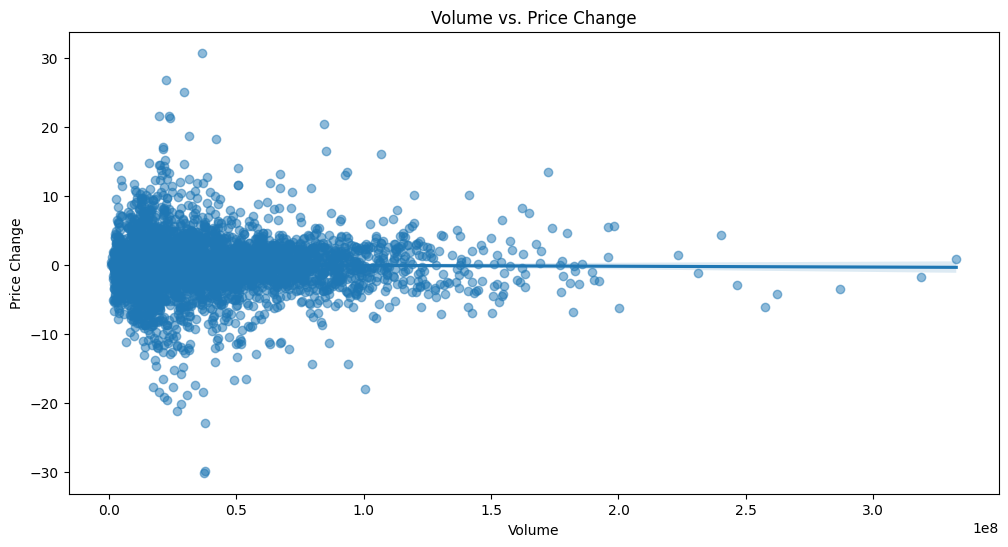

In [177]:
# Calculate the correlation between Volume and Price Change (without adding a column)
correlation = df['Volume'].corr(df['Close Price'] - df['Open Price'])
print(f'Correlation between Trading Volume and Price Change: {correlation}')

# Scatter plot with a regression line without adding a 'Price Change' column
plt.figure(figsize=(12, 6))
sns.regplot(x='Volume', y=df['Close Price'] - df['Open Price'], data=df, scatter_kws={'alpha': 0.5})
plt.title('Volume vs. Price Change')
plt.xlabel('Volume')
plt.ylabel('Price Change')
plt.show()


How do AAPL's opening and closing prices compare on a daily or monthly basis? (Opening vs. closing prices over time)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4572\2514278948.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.groupby(pd.Grouper(key='Date', freq='6M')).agg({'Open Price': 'first', 'Close Price': 'last'}).reset_index()


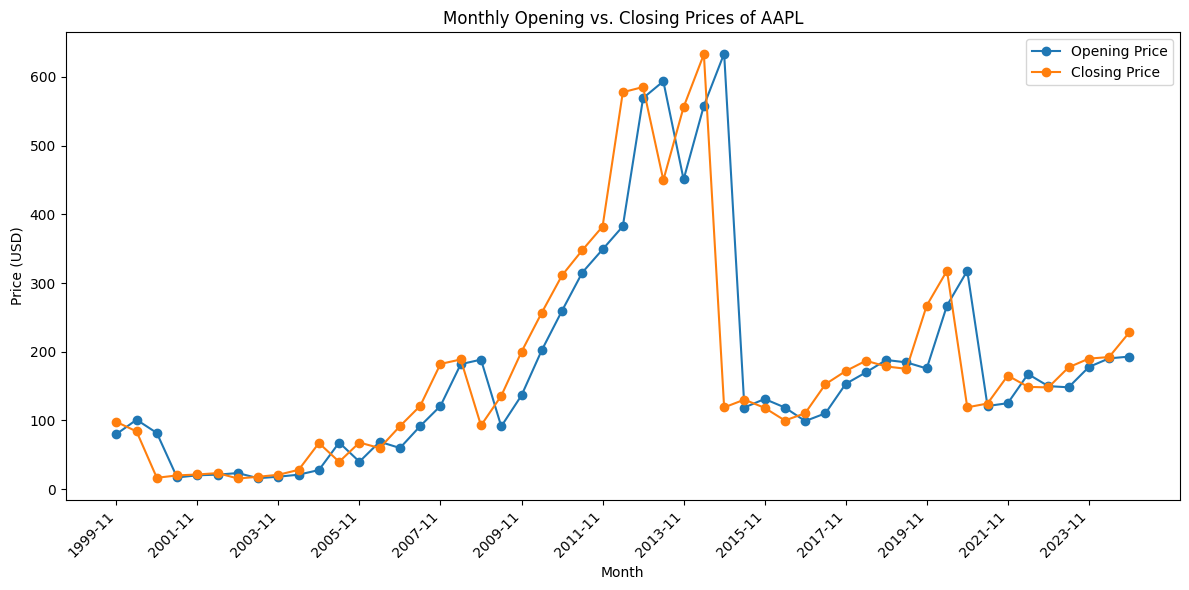

In [178]:
# Group by 6-month intervals and aggregate the High and Low prices
monthly_data = df.groupby(pd.Grouper(key='Date', freq='6M')).agg({'Open Price': 'first', 'Close Price': 'last'}).reset_index()

# Format the Date column to show year and month in the desired format (YYYY-MM)
monthly_data['Date'] = monthly_data['Date'].dt.strftime('%Y-%m')

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Open Price'], label='Opening Price', marker='o')
plt.plot(monthly_data['Date'], monthly_data['Close Price'], label='Closing Price', marker='o')

# Set xticks to show every 4th label
plt.xticks(ticks=range(0, len(monthly_data), 4), labels=monthly_data['Date'][::4], rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.title('Monthly Opening vs. Closing Prices of AAPL')
plt.legend()
plt.tight_layout()

plt.show()


What are the highest and lowest stock prices within a specific period? (Identify and visualize stock price extremes over time)

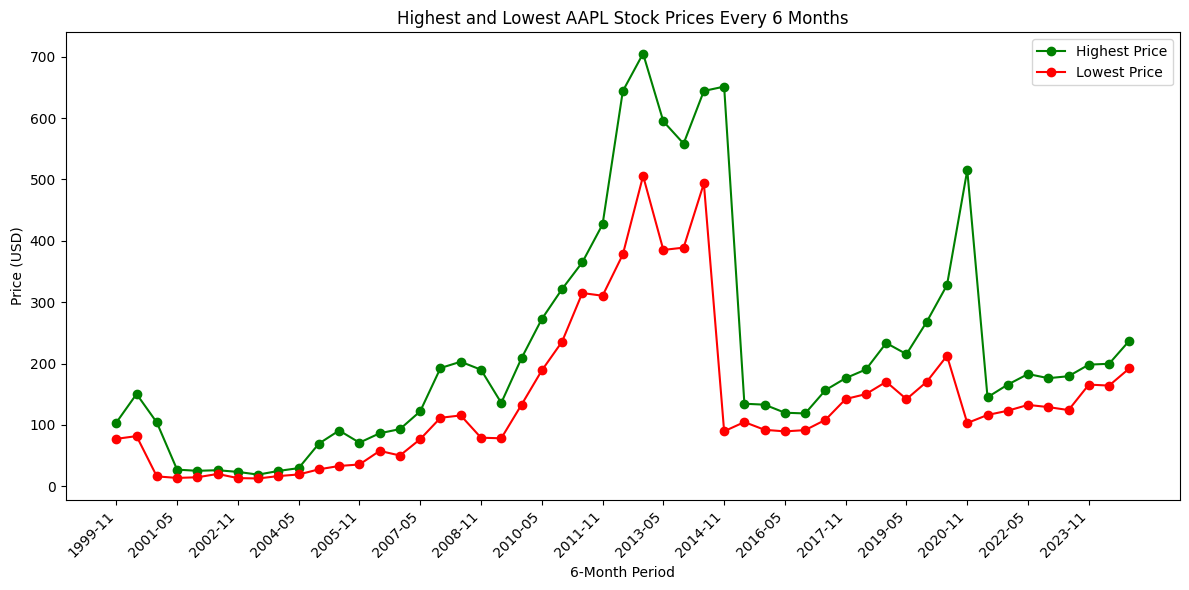

In [179]:
# Group by 6-month intervals and aggregate the High and Low prices
extremes_data = df.groupby(pd.Grouper(key='Date', freq='6ME')).agg({'High Price': 'max', 'Low Price': 'min'}).reset_index()

# Format the Date column to show year and month in the desired format (YYYY-MM)
extremes_data['Date'] = extremes_data['Date'].dt.strftime('%Y-%m')

# Input validation for skipping interval
while True:
    user_input = input("Enter the interval for skipping labels (e.g., 2 for every 2nd label, 6 for every 6th label): ")
    if user_input.isdigit():  # Check if the input is a digit
        skip_interval = int(user_input)
        break  # Exit the loop if valid input is provided
    else:
        print("Invalid input. Please enter a valid number.")
        
# Plotting the highest and lowest prices
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.plot(extremes_data['Date'], extremes_data['High Price'], label='Highest Price', marker='o', color='g')
plt.plot(extremes_data['Date'], extremes_data['Low Price'], label='Lowest Price', marker='o', color='r')

# Set xticks to show labels based on the user's chosen interval
plt.xticks(ticks=range(0, len(extremes_data), skip_interval), labels=extremes_data['Date'][::skip_interval], rotation=45, ha='right')

# Labels and title
plt.xlabel('6-Month Period')
plt.ylabel('Price (USD)')
plt.title('Highest and Lowest AAPL Stock Prices Every 6 Months')

# Show the legend
plt.legend()

# Adjust layout for better display
plt.tight_layout()

# Display the plot
plt.show()


How has AAPL's stock performed in specific months or years? (Monthly or yearly average stock prices).

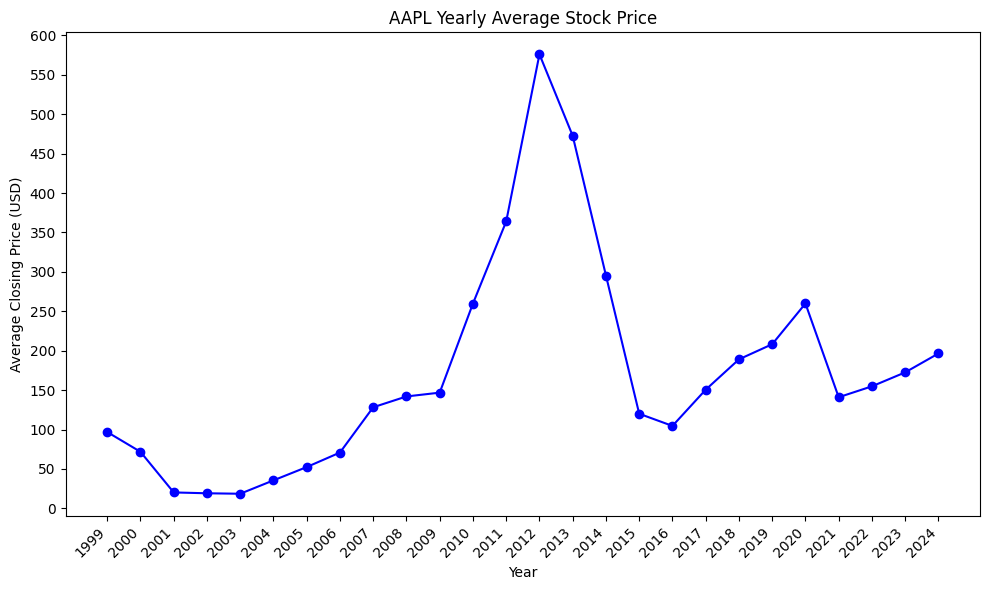

In [180]:
# Group by year and calculate the average closing price for each year without modifying the original dataset
yearly_avg_prices = df.groupby(df['Date'].dt.year)['Close Price'].mean().reset_index()

# Plotting the average closing price per year
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(yearly_avg_prices['Date'], yearly_avg_prices['Close Price'], marker='o', color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Closing Price (USD)')
plt.title('AAPL Yearly Average Stock Price')

# Display all years on the x-axis
plt.xticks(yearly_avg_prices['Date'], rotation=45, ha='right')

# Set Y-axis ticks with a gap of 50
y_min = int(min(yearly_avg_prices['Close Price']) // 50 * 50)  # Determine the lower bound of Y-axis rounded to nearest 50
y_max = int(max(yearly_avg_prices['Close Price']) // 50 * 50 + 50)  # Upper bound rounded to nearest 50
plt.yticks(range(y_min, y_max + 50, 50))  # Set the Y-axis ticks to increments of 50

# Adjust layout for better display
plt.tight_layout()

# Display the plot
plt.show()


In [181]:
df1

,Date,Declaration Date,Record Date,Payment Date,Dividend
0,2012-08-09,NaT,NaT,NaT,2.650
1,2012-11-07,NaT,NaT,NaT,2.650
2,2013-02-07,NaT,NaT,NaT,2.650
3,2013-05-09,NaT,NaT,NaT,3.050
4,2013-08-08,NaT,NaT,NaT,3.050
5,2013-11-06,NaT,NaT,NaT,3.050
6,2014-02-06,NaT,NaT,NaT,3.050
7,2014-05-08,NaT,NaT,NaT,3.290
8,2014-08-07,NaT,NaT,NaT,0.470
9,2014-11-06,NaT,NaT,NaT,0.470


What is the trend in AAPL's dividend payments over the years? (Dividend amounts over time)

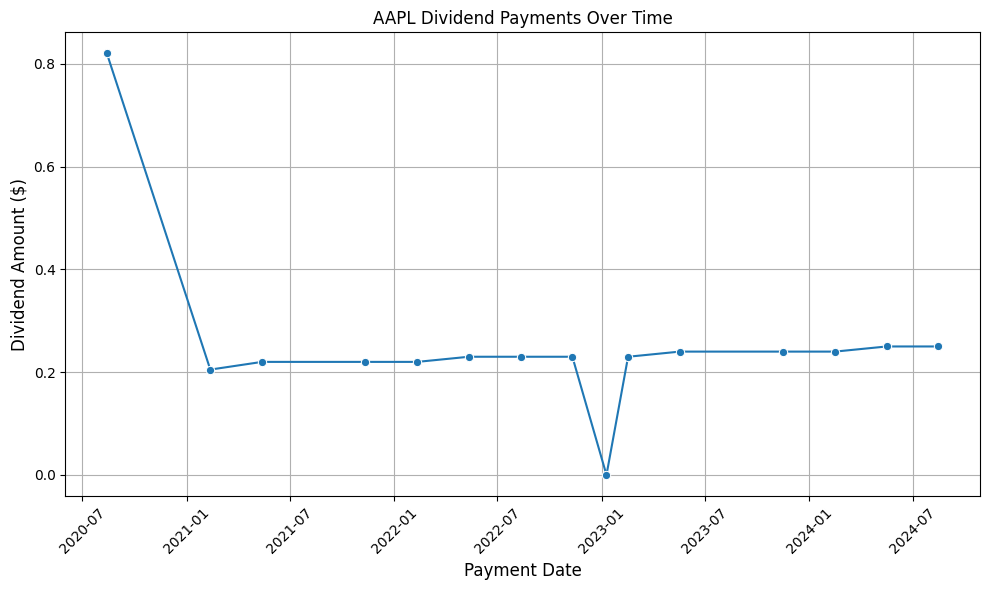

In [182]:
# Filter out rows with NaT in 'Payment Date'
dividend_data = df1.dropna(subset=['Payment Date'])

# Create a line plot for dividend payments over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=dividend_data, x='Payment Date', y='Dividend', marker='o')

# Customize the plot
plt.title('AAPL Dividend Payments Over Time', fontsize=12)
plt.xlabel('Payment Date', fontsize=12)
plt.ylabel('Dividend Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

How frequently does AAPL pay dividends, and how has this changed over time?

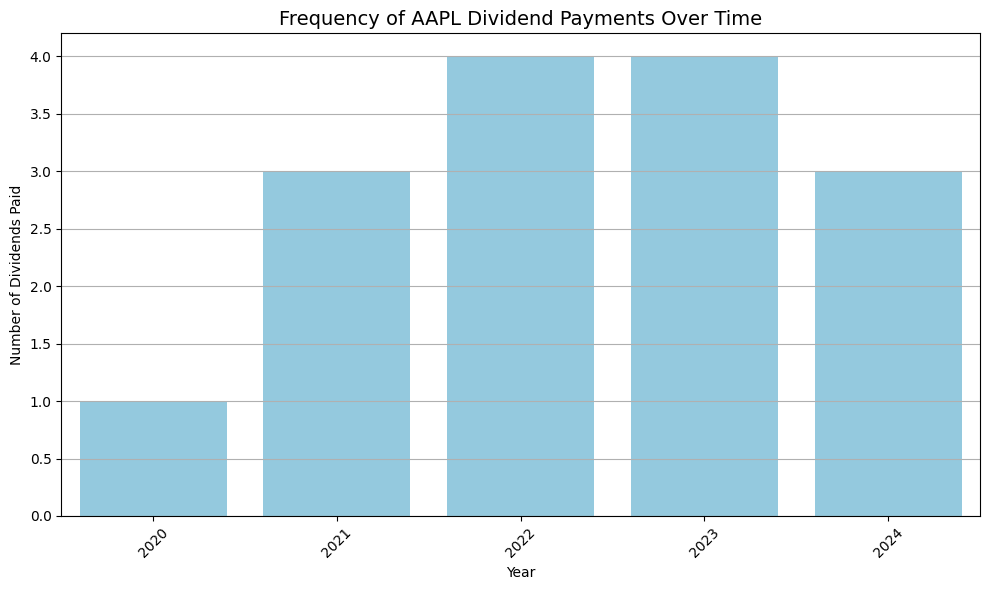

In [183]:
# Drop rows where 'Payment Date' is NaT and create a clean copy to avoid SettingWithCopyWarning
df1 = df1.dropna(subset=['Payment Date']).copy()

# Extract the year from the 'Payment Date' column and use .loc to avoid warnings
df1.loc[:, 'Year'] = df1['Payment Date'].dt.year

# Drop rows where 'Year' is NaN (if there are any)
df1 = df1.dropna(subset=['Year'])

# Convert 'Year' to integer first, then to string for plotting
df1['Year'] = df1['Year'].astype('int64').astype(str)

# Count the number of dividend payments per year
dividend_per_year = df1.groupby('Year').size().reset_index(name='Dividend')

# Create a bar plot for the number of dividend payments per year
plt.figure(figsize=(10, 6))
sns.barplot(data=dividend_per_year, x='Year', y='Dividend', color='skyblue')  # Use a single color

# Customize the plot
plt.title('Frequency of AAPL Dividend Payments Over Time', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Dividends Paid', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()


What is the average dividend amount paid by AAPL each year?

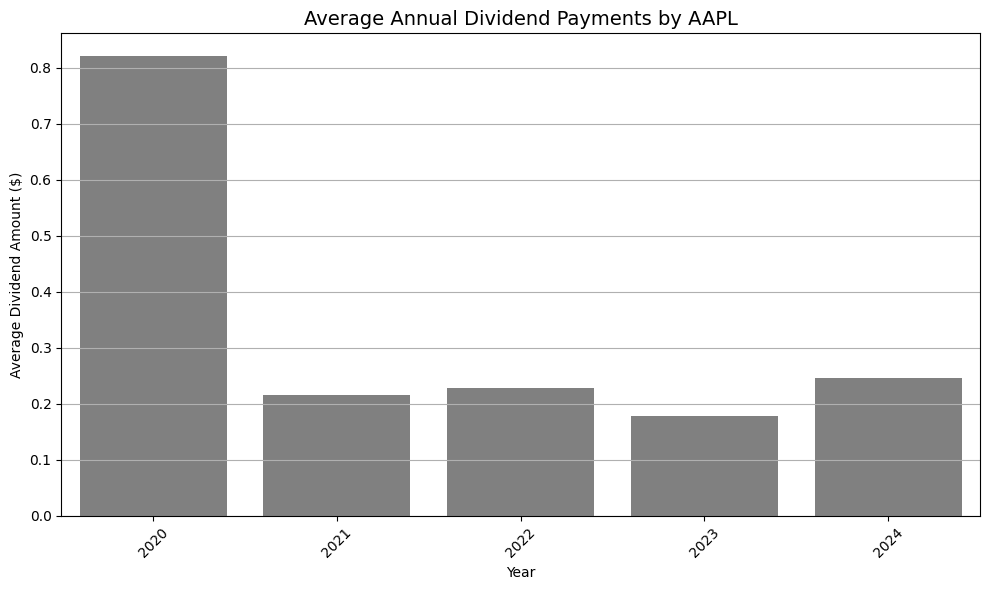

In [184]:
# Drop rows where 'Payment Date' is NaT and create a clean copy to avoid SettingWithCopyWarning
dividend_data_clean = df1.dropna(subset=['Payment Date']).copy()

# Extract the year from the 'Payment Date' column
dividend_data_clean.loc[:, 'Year'] = dividend_data_clean['Payment Date'].dt.year

# Drop rows where 'Year' is NaN (if there are any)
dividend_data_clean = dividend_data_clean.dropna(subset=['Year'])

# Convert 'Year' to integer for easier handling
dividend_data_clean['Year'] = dividend_data_clean['Year'].astype('int64')

# Calculate the average dividend amount per year
average_dividend_per_year = dividend_data_clean.groupby('Year')['Dividend'].mean().reset_index(name='Average Dividend Amount')

# Create a bar plot for the average annual dividend payments
plt.figure(figsize=(10, 6))
sns.barplot(data=average_dividend_per_year, x='Year', y='Average Dividend Amount', color='grey')

# Customize the plot
plt.title('Average Annual Dividend Payments by AAPL', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Dividend Amount ($)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

In [185]:
df

,Date,Open Price,High Price,Low Price,Close Price,Volume
0,1999-11-01,80.00,80.69,77.37,77.62,2487300.0
1,1999-11-02,78.00,81.69,77.31,80.25,3564600.0
2,1999-11-03,81.62,83.25,81.00,81.50,2932700.0
3,1999-11-04,82.06,85.37,80.62,83.62,3384700.0
4,1999-11-05,84.62,88.37,84.00,88.31,3721500.0
...,...,...,...,...,...,...
6257,2024-09-16,216.54,217.22,213.92,216.32,59357427.0
6258,2024-09-17,215.75,216.90,214.50,216.79,45519339.0
6259,2024-09-18,217.55,222.71,217.54,220.69,59894928.0
6260,2024-09-19,224.99,229.82,224.63,228.87,66781315.0


In [190]:
df2

,Date,Stock Splits
0,1987-06-16 04:00:00,2:01
1,2000-06-21 04:00:00,2:01
2,2005-02-28 05:00:00,2:01
3,2014-06-09 04:00:00,7:01
4,2020-08-31 04:00:00,4:01


How many stock splits has AAPL had, and what were the corresponding ratios? (Stock split events and ratios)

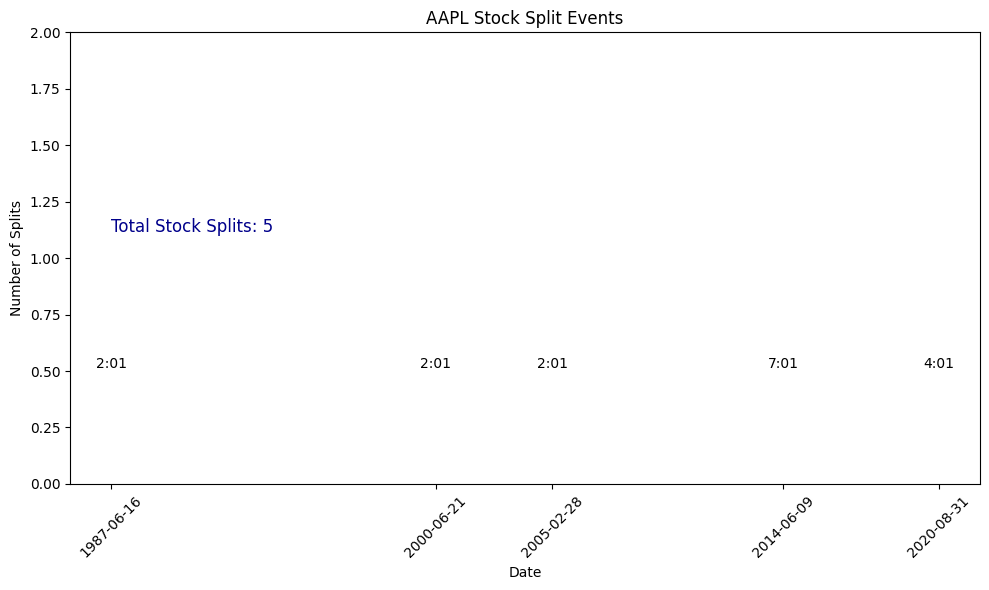

In [196]:
# Count of stock splits
total_splits = len(df2)

# Plotting
plt.figure(figsize=(10, 6))
# Use a height of 1.2 to make it visible
plt.bar(df2['Date'], [1.2]*len(df2), color='skyblue', width=0.4)  
plt.xticks(df2['Date'], df2['Date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.title('AAPL Stock Split Events')
plt.ylabel('Number of Splits')
plt.ylim(0, 2)  # Adjust the y-limits to ensure visibility
plt.xlabel('Date')

# Annotate each bar with the split ratio
for i, ratio in enumerate(df2['Stock Splits']):
    plt.text(df2['Date'][i], 1.1, ratio, ha='center', va='bottom')

# Display total count of stock splits on the plot
plt.text(df2['Date'].iloc[0], 1.3, f'Total Stock Splits: {total_splits}', 
         ha='left', va='bottom', fontsize=12, color='darkblue')

plt.tight_layout()
plt.show()